In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cPickle as pickle
import sys
current_dir = %pwd

# Sarsa using RAM features

In [3]:
log_dir = current_dir + '/../logs'
ram_log_dir = log_dir + '/sarsa_RAM'
numtrials=3
numep = 2000

In [9]:
# Have a look at the data if you want
with open(ram_log_dir + '/SARSA_RAM_1.log') as f:
    log = pickle.load(f)

In [11]:
# store data in a 2d array
steps = np.zeros((numep,numtrials))

for t in range(1,numtrials+1):
    with open(ram_log_dir + '/SARSA_RAM_{}.log'.format(t), 'rb') as f:
        log = pickle.load(f)
        actualLength = len(log['steps'])
        steps[0:actualLength,t-1] = np.array(log['steps'])

Calculate basic statistics of number of steps over different trials

In [17]:
from scipy import stats
mean_steps = np.mean(steps,axis=1) #average steps
err = stats.sem(steps,axis=1) #standard error of mean

#statistics for first 500 episodes
mean_500 = np.mean(steps[:50,:],axis=1)
err_500 = stats.sem(steps[:50,:],axis=1) #standard error of mean


145.0


Plot learning curves with 95% confidence (t_dist standard error Note: this assumes normal distribution of means, probably not true here)

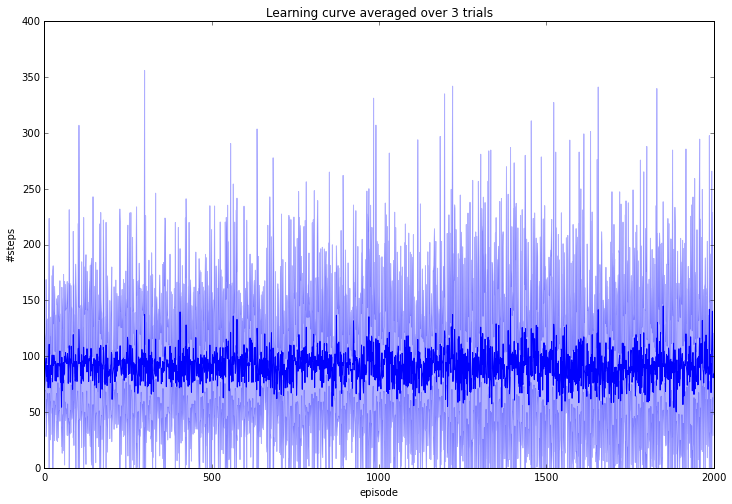

In [28]:
plt.figure(figsize=(12,8))

confidence = 0.95
#factor for given confidence and number of trials
t= stats.t._ppf((1+confidence)/2., numtrials-1)

color='blue'
plt.plot(mean_steps)
plt.fill_between(np.arange(numep),(mean_steps-t*err),(mean_steps+t*err),alpha=0.3,color=color)

plt.xlabel('episode')
plt.ylabel('#steps')
plt.ylim((0,400))
plt.title('Learning curve averaged over {} trials'.format(numtrials))

We can smooth the curves by taking a running average or applying a filter

In [24]:
from scipy.signal import gaussian
from scipy.ndimage import filters

#gaussian filter (running average but closer points have higher weights)
def smoothing(x,window,axis=0):
    filt = gaussian(window,2.)
    return filters.convolve1d(x,filt/np.sum(filt),axis)

#standard running average
def running_average(x,window,axis=0):
    return filters.convolve1d(x,np.ones(window),axis)

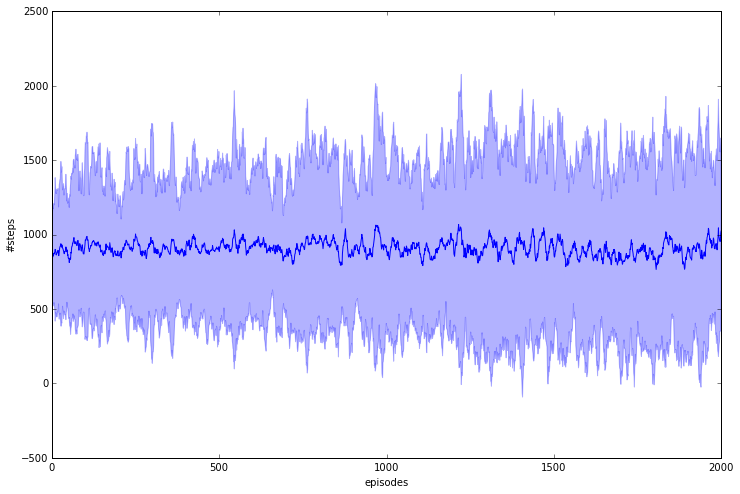

In [27]:
mean_sm = running_average(mean_steps,10)
err_sm = running_average(err,10)

plt.figure(figsize=(12,8))
plt.plot(mean_sm)
plt.fill_between(np.arange(numep),(mean_sm-t*err_sm),(mean_sm+t*err_sm),alpha=0.3,color=color)

plt.ylabel('#steps')
plt.xlabel('episodes')
